<a href="https://colab.research.google.com/github/Uzi78/ML_Projects/blob/main/Iris_Specie_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris_ds = pd.read_csv("Iris.csv")
print(iris_ds.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Exploratory Data Analysis (EDA)

In [11]:
iris_ds["Species"].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [13]:
iris_ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Pairwise Scatter Plot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


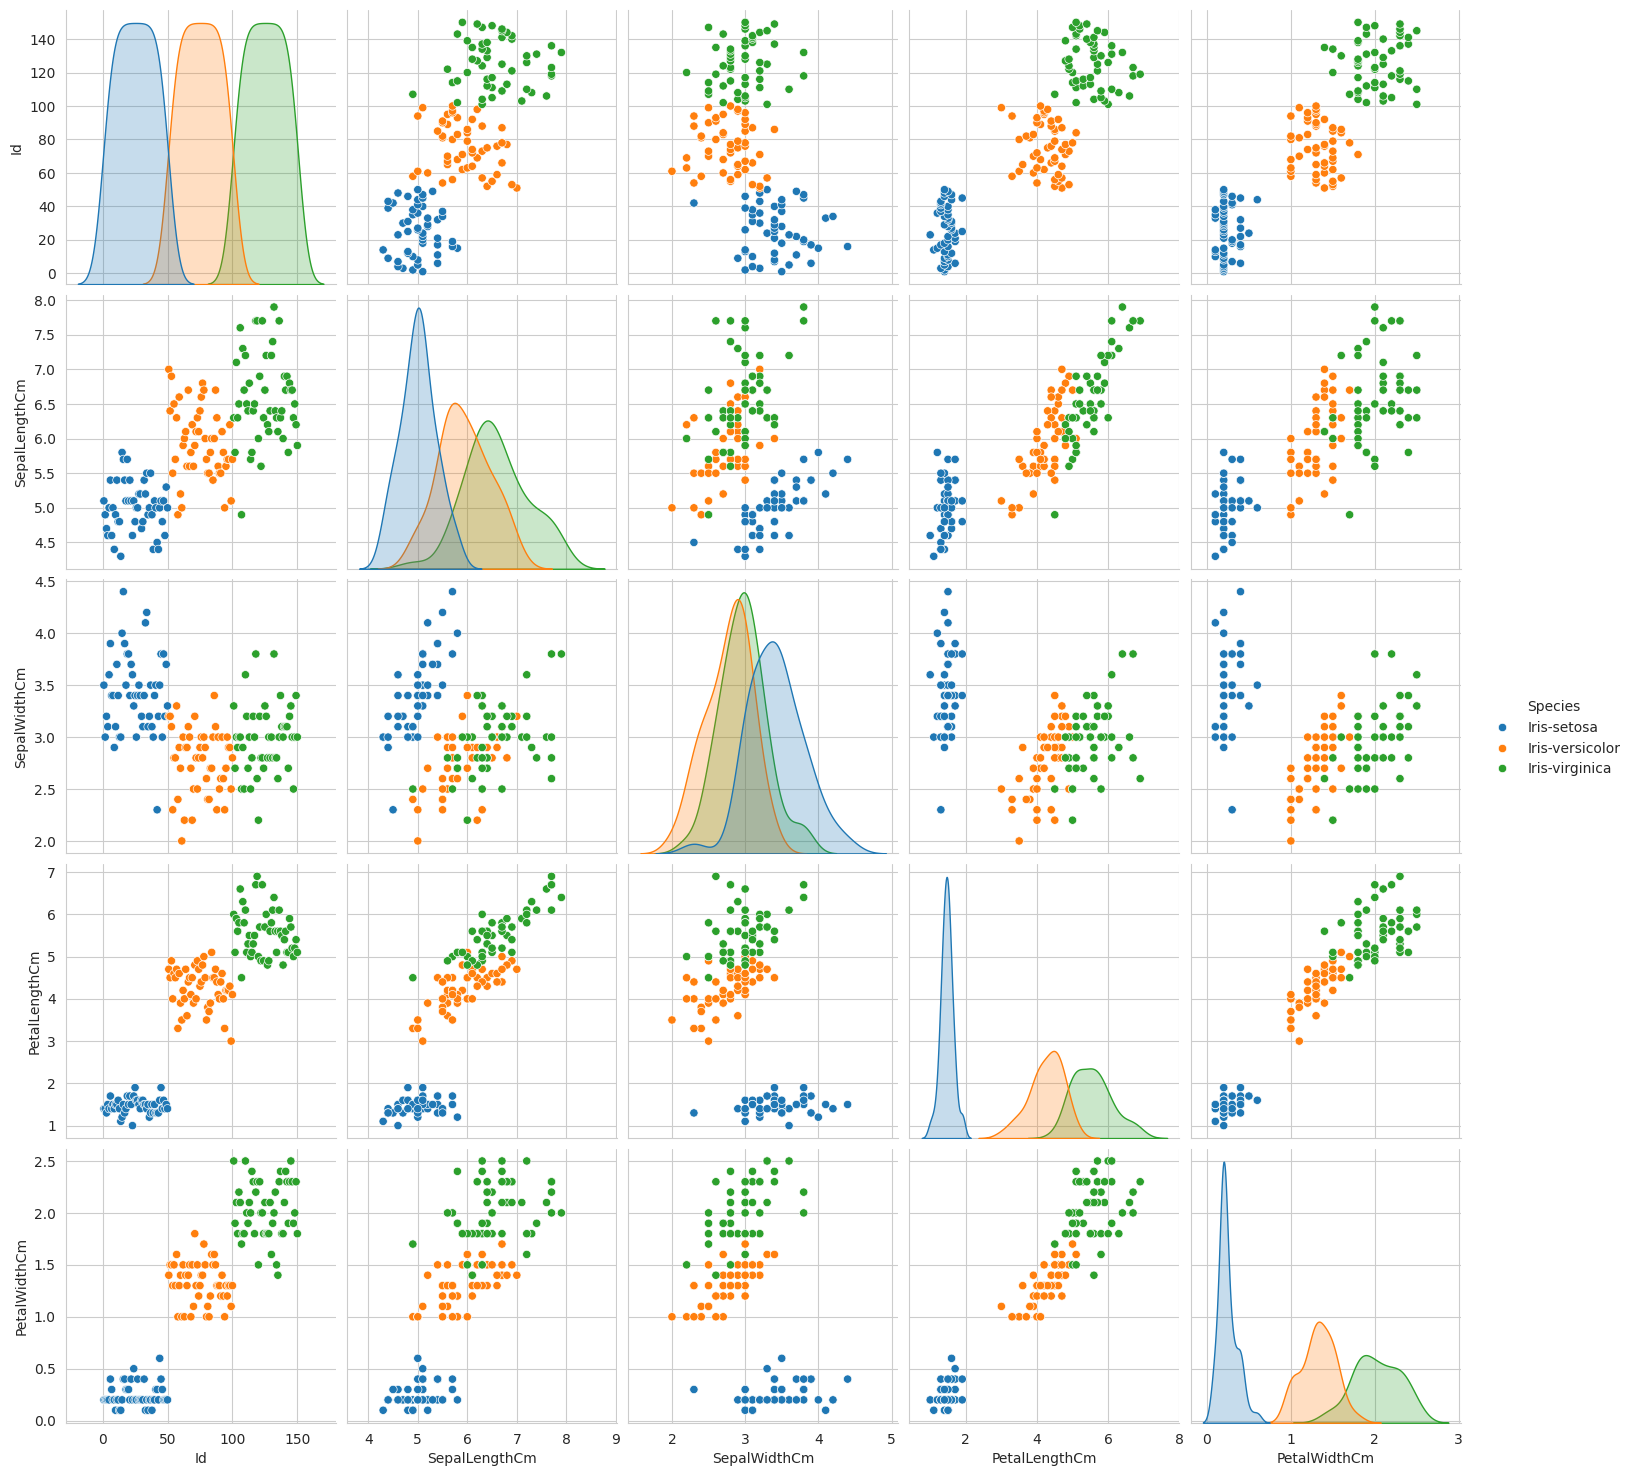

In [16]:
sns.set_style("whitegrid")
sns.pairplot(iris_ds,hue="Species",size=3,aspect=1)
plt.show()

2D scatter Plot

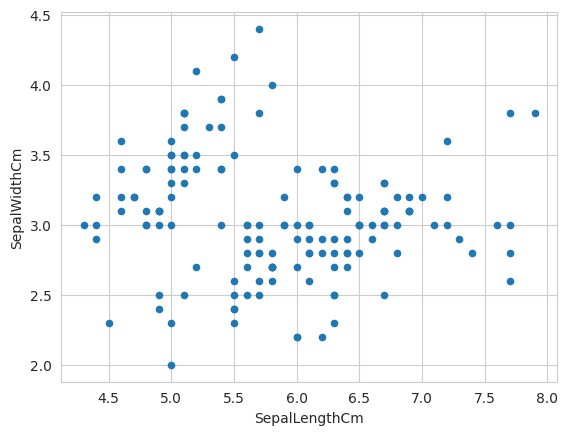

In [18]:
iris_ds.plot(kind='scatter', x='SepalLengthCm',y='SepalWidthCm')
plt.show()

##Model Development

In [20]:
from sklearn.model_selection import train_test_split

In [65]:
X = iris_ds.drop(["Species"], axis=1)
y = iris_ds["Species"]

In [64]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_ds['Species']= label_encoder.fit_transform(iris_ds['Species'])

iris_ds['Species'].unique()

array([0, 1, 2])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [68]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [70]:
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
RMSE value = 0.15
R2 Score= 0.97


### SVM

In [74]:
from sklearn import svm

svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [75]:
print('The accuracy of the SVM is: %.2f'%accuracy_score(pred,y_test))
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, pred))

The accuracy of the SVM is: 0.98
RMSE value = 0.15
R2 Score= 0.97


### Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test)

In [78]:
print('The accuracy of the naive_bayes is:',accuracy_score(predicted,y_test))
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, predicted))

The accuracy of the naive_bayes is: 0.9777777777777777
RMSE value = 0.15
R2 Score= 0.97
